## Detection des yeux et du nez

In [19]:
import cv2
import numpy
import matplotlib.pyplot as plt

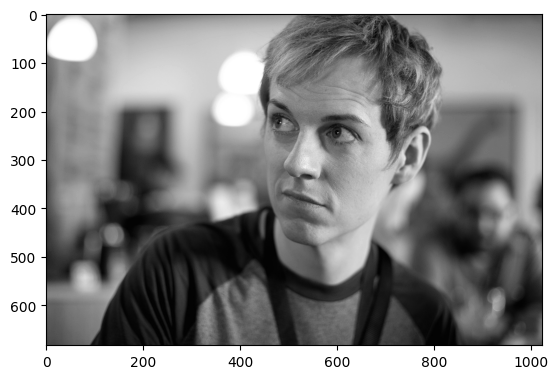

In [20]:
# Charger l'image
image = cv2.imread('visage.jpg')

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Afficher l'image en niveaux de gris
plt.imshow(gray_image, cmap='gray')
plt.show()

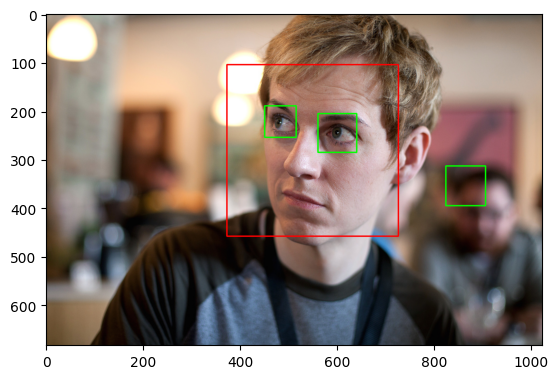

In [22]:
# Charger les classificateurs en cascade Haar pour les visages, les yeux, le nez et la bouche
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
nose_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_nose.xml')
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_mouth.xml')

# Détecter les visages
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))
eyes = eye_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))
#nose = nose_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))
#mouth = mouth_cascade.detectMultiScale(gray_image, 1.3, 5)

# Pour chaque visage détecté
for (x, y, w, h) in faces:
    # Dessiner un rectangle rouge avec une épaisseur de 2
    image_rectangle = cv2.rectangle(image.copy(), (x, y), (x+w, y+h), (0, 0, 255), 2)
    
    
for (ex,ey,ew,eh) in eyes:
    image_eye = cv2.rectangle(image_rectangle,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

# Afficher l'image
plt.imshow(cv2.cvtColor(image_eye, cv2.COLOR_BGR2RGB))
plt.show()

## Faire avec une webcam

In [23]:
# Charger les classificateurs en cascade Haar pour les visages et les yeux
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Ouvrir la webcam
cap = cv2.VideoCapture(0)

while True:
    # Lire l'image de la webcam
    ret, frame = cap.read()
    if not ret:
        break

    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Détecter les visages et les yeux
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

    # Pour chaque visage détecté
    for (x, y, w, h) in faces:
        # Dessiner un rectangle rouge avec une épaisseur de 2
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)

    # Pour chaque œil détecté
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(frame,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    # Afficher l'image
    cv2.imshow('Video', frame)

    # Si l'utilisateur appuie sur 'q', quitter la boucle
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer la webcam et fermer les fenêtres
cap.release()
cv2.destroyAllWindows()